In [1]:
import pl from "npm:nodejs-polars";

let response = await fetch(
  "https://cdn.jsdelivr.net/npm/world-atlas@1/world/110m.tsv"
);
let data = await response.text();
let df = pl.readCSV(data, { sep: "\t" });
df

scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10,iso_a2,iso_a3,iso_n3,un_a3,wb_a2,wb_a3,woe_id,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart
1,Admin-0 country,6,Kosovo,KOS,0,2,Sovereign country,Kosovo,KOS,0,Kosovo,KOS,0,Kosovo,KOS,1,Kosovo,Kosovo,B57,Kosovo,null,Kos.,KO,Republic of Kosovo,null,null,Self admin.; Claimed by Serbia,Kosovo,null,2,2,3,11,1804838,5352,-99,1981,-99,6. Developing region,4. Lower middle income,-99,null,-99,-99,-99,-99,KV,KSV,-99,SRB,KOS,-99,-99,Europe,Europe,Southern Europe,Europe & Central Asia,6,6,4,-99,1
1,Admin-0 country,5,Somaliland,SOL,0,2,Indeterminate,Somaliland,SOL,0,Somaliland,SOL,0,Somaliland,SOL,1,Somaliland,Somaliland,B30,Somaliland,null,Solnd.,SL,Republic of Somaliland,null,Self admin.,Self admin.; Claimed by Somalia,Somaliland,null,3,6,5,2,3500000,12250,-99,-99,-99,6. Developing region,4. Lower middle income,-99,null,-99,-99,-99,-99,-99,-99,-99,SOM,SOM,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,10,10,6,-99,1
1,Admin-0 country,6,Northern Cyprus,CYN,0,2,Sovereign country,Northern Cyprus,CYN,0,Northern Cyprus,CYN,0,Northern Cyprus,CYN,1,N. Cyprus,Northern Cyprus,B20,N. Cyprus,null,N. Cy.,CN,Turkish Republic of Northern Cyprus,null,Self admin.,Self admin.; Claimed by Cyprus,"Cyprus, Northern",null,3,1,4,8,265100,3600,-99,-99,-99,6. Developing region,3. Upper middle income,-99,null,-99,-99,-99,-99,-99,-99,-99,CYP,CYP,-99,-99,Asia,Asia,Western Asia,Europe & Central Asia,9,15,6,-99,1
1,Admin-0 country,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,Afghanistan,AFG,0,Afghanistan,AFG,0,Afghanistan,Afghanistan,AFG,Afghanistan,null,Afg.,AF,Islamic State of Afghanistan,null,null,null,Afghanistan,null,5,6,8,7,28400000,22270,-99,1979,-99,7. Least developed region,5. Low income,-99,null,AF,AFG,4,4,AF,AFG,-99,AFG,AFG,-99,-99,Asia,Asia,Southern Asia,South Asia,11,11,4,-99,1
1,Admin-0 country,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,Angola,AGO,0,Angola,AGO,0,Angola,Angola,AGO,Angola,null,Ang.,AO,People's Republic of Angola,null,null,null,Angola,null,3,2,6,1,12799293,110300,-99,1970,-99,7. Least developed region,3. Upper middle income,-99,null,AO,AGO,24,24,AO,AGO,-99,AGO,AGO,-99,-99,Africa,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1
1,Admin-0 country,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,Albania,ALB,0,Albania,ALB,0,Albania,Albania,ALB,Albania,null,Alb.,AL,Republic of Albania,null,null,null,Albania,null,1,4,1,6,3639453,21810,-99,2001,-99,6. Developing region,4. Lower middle income,-99,null,AL,ALB,8,8,AL,ALB,-99,ALB,ALB,-99,-99,Europe,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1
1,Admin-0 country,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,0,United Arab Emirates,ARE,0,United Arab Emirates,ARE,0,United Arab Emirates,United Arab Emirates,ARE,United Arab Emirates,null,U.A.E.,AE,United Arab Emirates,null,null,null,United Arab Emirates,null,2,1,3,3,4798491,184300,-99,2010,-99,6. Developing region,2. High income: nonOECD,-99,null,AE,ARE,784,784,AE,ARE,-99,ARE,ARE,-99,-99,Asia,Asia,Western Asia,Middle East & North Africa,20,20,6,-99,1
1,Admin-0 country,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,0,Argentina,ARG,0,Argentina,ARG,0,Argentina,Argentina,ARG,Argentina,null,Arg.,AR,Argentine Republic,null,null,null,Argentina,null,3,1,3,13,40913584,573900,-99,2010,-99,5. Emerging region: G20,3. Upper middle income,-99,null,AR,ARG,32,32,AR,ARG,-99,ARG,ARG,-99,-99,South America,Americas,South America,Latin America & Caribbean,9,9,4,-99,1
1,Admin-0 country,6,Armenia,ARM,0,2,Sovereign country,Armenia,ARM,0,Armenia,ARM,0,Armenia,A

In [2]:
let df = pl.readCSV(data, { sep: "\t" });

df = df
  .groupBy("continent")
  .agg(
    pl.col("pop_est").sum().alias("total_pop_est"),
    pl.col("subregion").count().alias("number_of_subregions")
  );

df = df.sort("continent");

df

continent,total_pop_est,number_of_subregions
Africa,993281878,51
Antarctica,3802,1
Asia,4085852698,47
Europe,728131201,39
North America,539350981,18
Oceania,33519610,7
Seven seas (open ocean),140,1
South America,394355478,13


In [3]:
import * as d3 from "npm:d3";

const max = d3.max(df.total_pop_est);
const xScaleSorted = d3.scaleLinear().domain([0, max]).range([0, 300]);
const yScaleSorted = d3
  .scaleBand()
  .domain(df.continent)
  .range([0, 300])
  .padding(0.1);

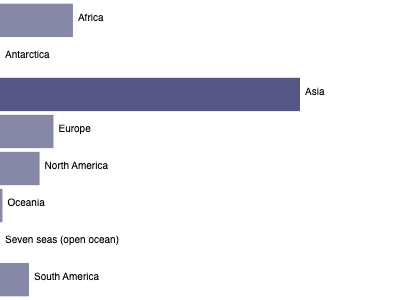

In [4]:
import {
  createCanvas,
  Image,
  Path2D,
} from "jsr:@gfx/canvas@0.5.6";

const canvas = createCanvas(400, 300);
const ctx = canvas.getContext("2d");

df.toRecords().forEach((record, i) => {
  const y = yScaleSorted(record.continent);
  const width = xScaleSorted(record.total_pop_est);
  const height = yScaleSorted.bandwidth();

  ctx.fillStyle = width < xScaleSorted(max) ? "#8787A7" : "#575787";
  ctx.fillRect(0, y, width, height);
  ctx.fillStyle = "#000";
  ctx.fillText(record.continent, width + 5, y + height / 2);
});

canvas

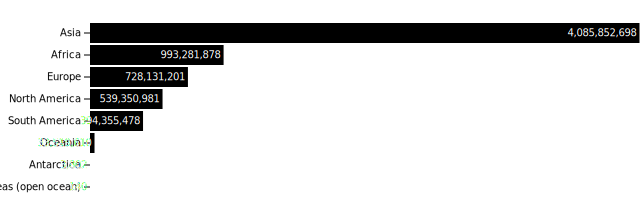

In [5]:
import Plot from "https://deno.land/x/plot/mod.ts"

let records = df.toRecords();

Plot.plot({
    marginLeft: 90,
    x: { axis: null },
    y: { label: null },
    marks: [
      Plot.barX(records, {
        x: "total_pop_est",
        y: "continent",
        sort: { y: "x", reverse: true, limit: 10 },
        fill: "rebeccaPurple",
      }),
    
      Plot.text(records, {
        text: (d) => d.total_pop_est.toLocaleString(),
        y: "continent",
        x: "total_pop_est",
        textAnchor: "end",
        dx: -3,
        fill: "white",
      }),
    ],
})
